In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Below comand shows there are total 30 rows and 2 columns in the input dataset.


In [3]:
# shape Of the Data Set
print(dataset.shape)

(30, 2)


In [4]:
# descriptions/Statistical Summary
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


### Below graph shows there is a linear relationship between between YearsExperience and Salary

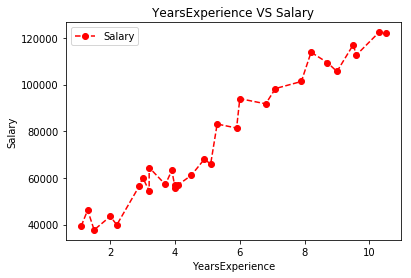

In [5]:
plt.plot(dataset["YearsExperience"], dataset["Salary"], 'ro--')
plt.title('YearsExperience VS Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

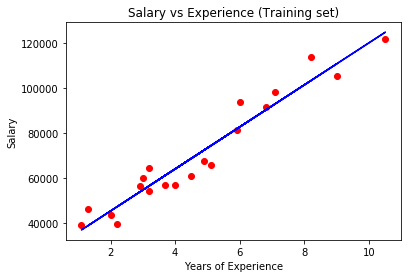

In [9]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

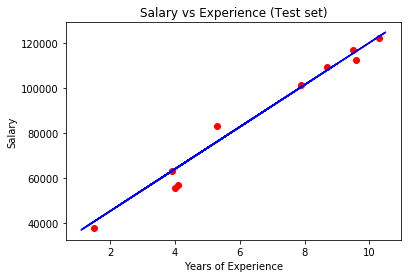

In [10]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Predicting The Test Data By Using The Simple Linear Regression Algorithm And Writing The Test Data + Predicted Column  Into CSV File

In [11]:
df1 = pd.DataFrame(X_test)
df2 = pd.DataFrame(y_pred)
df1.columns = ['Years Of Experience']
df2.columns = ['Predicted Salary']
submission = pd.concat([df1,df2],axis = 1)
submission.to_csv('submission.csv', index=False)
submission

,Years Of Experience,Predicted Salary
0,1.5,40835.105909
1,10.3,123079.399408
2,4.1,65134.556261
3,3.9,63265.367772
4,9.5,115602.645454
5,8.7,108125.891499
6,9.6,116537.239698
7,4.0,64199.962017
8,5.3,76349.687193
9,7.9,100649.137545
